![image](https://www.earth.ac.cr/wp-content/themes/cummins/images/logo-es.png)
## Curso de Programación aplicada a la agricultura
###Material de apoyo Tema Análisis de Datos
# Jupyter_5 Principios de los algoritmos de aprendizaje automático

### Preparado por:
Prof. Gregory Guevara, 
Enero 2023, gguevara@earth.ac.cr


**Aprendizaje Automatico**

Principios de Aprendizaje Supervisado##

En este trabajo se seleccionará un conjunto de datos (dataset) de alguna de las fuentes propuestas en clase, o bien de algún repositorio que considere oportuno. Se llevarán a cabo diferentes tareas de aprendizaje automático (tipo benchmark) y se hará un análisis de los resultados y estrategia de diseño de los diferentes experimentos propuestos por ustedes.

Diagrama: ![](https://cdn-images-1.medium.com/max/1600/1*eE8DP4biqtaIK3aIy1S2zA.png)

En el segundo, se construyen varios modelos secuencialmente y se intenta reducir el sesgo del modelo combinado. El objetivo es construir varios modelos débiles para producir un modelo fuerte. Ejemplos: AdaBoost y Gradient Tree Boosting.

Diagrama: ![](https://live.staticflickr.com/65535/48051633738_096b38a7db_b.jpg)

Fuentes:

https://scikit-learn.org/stable/modules/ensemble.html

https://aprendeia.com/metodos-de-ensamble-de-modelos-machine-learning-ensemble-methods-en-espanol/#:~:text=Los%20m%C3%A9todos%20de%20ensamble%20de%20modelos%20o%20m%C3%A9todos,problema%20particular.%20Pero%20veamos%20esto%20con%20un%20ejemplo%3A



#Preprocesado de los Datos#

In [1]:
import torch 
import math 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

##Paso 1. Descripción de los datos.
## Análisis de un DATA SET climático para evaluar relaciones entre parámetros metereológicos. 

Fuente de data: 
![](https://power.larc.nasa.gov/data-access-viewer/widgets/Information/images/POWER_logo.png)

El conjunto de datos fue tomado de NASA/POWER DATA ACCESS https://power.larc.nasa.gov/data-access-viewer/ , capturando datos climáticos de los misiones satelitales 
 - CERES y M
 - ERRA2 Native Resolution Daily Data


#### Datos Geográficos   
- Latitude  10.6259   
- Longitude -85.5294 
- Finca Campus LA FLOR Universidad EARTH.
- Libería Guanacaste 

##### Datos Temporales 
- Fecha de incio: 1 de enero del 2001
- Fecha final: 31 de diciembre del 2020
- 2 Décadas de datos climáticos 

De esta herramienta se descargo las 2 últimas decadas de datos climáticos a partir de satelites de NASA en sus misiones MERRA-2 y CERES. 

### Objetivo 

Analizar el comportamiento de la EVAPOTRANSPIRACION (requerimiento de agua por el ambiente) en términos de otras variables climáticas, usando Data sets 

### Descripción de los datos 

El conjunto de datos, en formato CSV (columnas separadas por coma), contiene 10 columnas, las columnas según su orden indica lo siguiente 

0. year: años de los datos, los cuales van desde 2001 hasta el 2020 (2 decadas)
1. DOY: day of the year (día del año)
2. top_rad:  top_radiation o radiación al tope de la admósfera (MJ/m2/día)
3. surface_rad: Radiación en la superficie de la tierra (MJ/m2/día)
4. uva-ra: radiación ultravioleta (W/m2-día)
5. t_min: temperatura mínima (°C)
6. t_max: temperatura máxima (°C) 
7. prec: precipitación (mm/día)
8. rel_hum: humedad relativa en %
9. surface_pres: presión barométrica (KPa)
10. eto: evapotranspiración potencial (mm/día)





## Paso 2. Apertura de los datos 


In [2]:

url='https://raw.githubusercontent.com/greko-guevara/tareas_IA/main/data_finca_laflor.csv'

df =pd.read_csv(url) #carpeta contenedora del archivo de inicio
df.shape

(7305, 11)

##Paso 3. Se analizan datos faltantes 

Se analiza la cantidad de datos faltantes 

In [3]:
print ("******************************")
print("Valores faltantes o NaN, en porcentajes:\n",(df.isnull().sum()/df.shape[0])*100)

******************************
Valores faltantes o NaN, en porcentajes:
 YEAR            0.000000
DOY             0.000000
top_rad         0.068446
surface_rad     0.301164
uva-ra          0.547570
t_min           0.725530
t_max           0.670773
prec            0.287474
rel_hum         0.109514
surface_pres    0.082136
eto             0.136893
dtype: float64


A continuación el proceso de limpieza de datos


In [4]:

#limpieza y acomodo de los datos
df= df.dropna() # me permite borrar valores vacios 
df= df[df['top_rad'] != 0]
df= df[df['surface_rad'] != 0]
df= df[df['uva-ra'] != 0]
df= df[df['t_min'] != 0]
df= df[df['t_max'] != 0]
#df= df[df['prec'] != 0] ==> atención es posible que tengamos datos de precipitación en cero (no lluvia ese día) por lo que se acepta ese valor. 
df= df[df['rel_hum'] != 0]
df= df[df['surface_pres'] != 0]
df= df[df['eto'] != 0]

print(df.shape)


df.describe()

(7146, 11)


,YEAR,DOY,top_rad,surface_rad,uva-ra,t_min,t_max,prec,rel_hum,surface_pres,eto
count,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000,7146.000000
mean,2010.547019,182.890428,35.353855,18.883529,13.644184,24.272491,31.702776,4.679163,75.356579,99.904643,4.084266
std,5.790641,105.550799,2.461045,3.733363,2.231266,1.121527,2.898399,11.850426,11.187449,0.120383,1.022427
min,2001.000000,1.000000,30.600000,2.680000,2.510000,19.530000,24.230000,0.000000,47.750000,99.460000,1.486210
25%,2005.000000,91.000000,33.210000,16.610000,12.350000,23.610000,29.430000,0.030000,64.940000,99.820000,3.315672
50%,2011.000000,182.000000,36.890000,19.180000,13.800000,24.380000,31.180000,0.820000,78.090000,99.910000,3.890909
75%,2016.000000,274.000000,37.280000,21.450000,15.150000,25.010000,34.040000,4.817500,85.060000,99.980000,4.863376
max,2020.000000,366.000000,37.900000,27.810000,18.900000,27.730000,39.010000,522.580000,94.000000,100.340000,6.570571


#### Se observa que en la columna de  precipitación hubo días de 500 mm o más, estos son eventos climáticos extremos, los cuales vamos a eliminar y  solo aceptaremos días con precipitaciones de no más  50 mm 

**se uso 50 mm como criterio base de infiltración, el resto del agua se constituye en escorrentía segun los balances hídricos**

In [5]:
# depuración de los outliears  
df=df[df.prec <= 50]
print (df.shape)

(7099, 11)



## Paso 4. se realizan gráficos exploratorios

In [6]:
#Usando Seaborn generamos un para de dispersión entre factores para observar relaciones
sns.pairplot(df);

In [7]:
# de forma similar contruimos un mapa de calor y observamos las correlaciones entre los factores 
"""
def correlation_heatmap(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)
    
correlation_heatmap(df)
"""

'\ndef correlation_heatmap(df):\n    _,ax=plt.subplots(figsize=(15,10))\n    colormap=sns.diverging_palette(220,10,as_cmap=True)\n    sns.heatmap(df.corr(),annot=True,cmap=colormap)\n    \ncorrelation_heatmap(df)\n'

####  Se concluye de los gráficos anteriores que:
- la evapotranspiración está altamente influenciada por la radiación y la temperatura principalmente, 
- los otros parámetros climáticos con precipitación, humedad relativa y presión barométrica no influyen en la evapotranspiración 
    
 #### A Partir de lo anterior definimos gráficos que visualicen las relaciones entre radiación y temperatura vrs ETO 

## Paso 5. Se establece una relación gráfica entre los factores de temperatura y radiación con respecto a ETO.


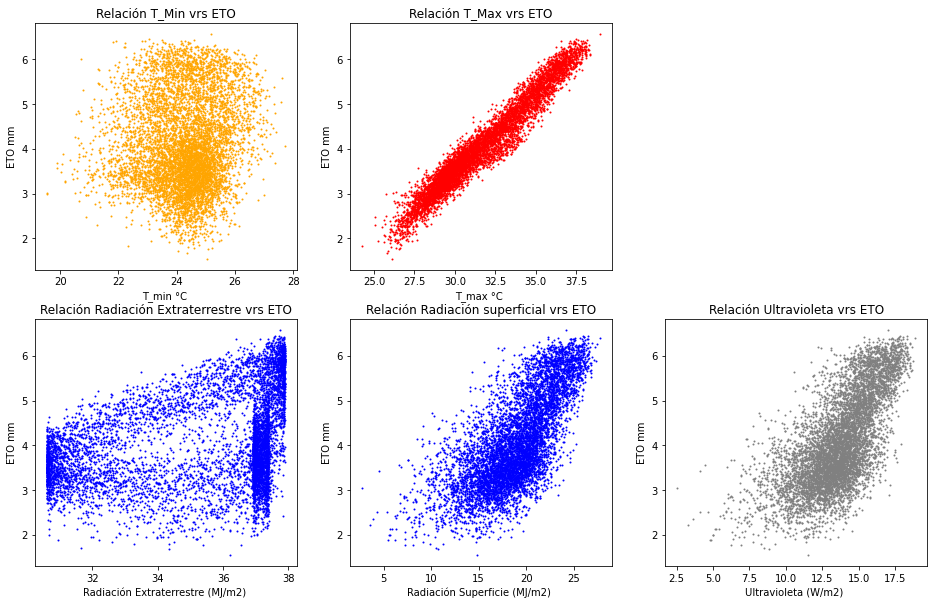

In [8]:
fig = plt.figure(figsize=(16,10))

#Grafico de relación Temperatura mínima vrs ETO 
plot1 = fig.add_subplot(231)
A = plt.scatter(df['t_min'],df['eto'], color='orange',s=1)
plt.xlabel('T_min °C ')
plt.ylabel('ETO mm')
plt.title('Relación T_Min vrs ETO')

#Grafico de relación Temperatura máxima vrs ETO 
plot1 = fig.add_subplot(232)
A = plt.scatter(df['t_max'],df['eto'], color='red',s=1)
plt.xlabel('T_max °C ')
plt.ylabel('ETO mm')
plt.title('Relación T_Max vrs ETO')

#Grafico de Radiación extraterrestre mínima vrs ETO 
plot1 = fig.add_subplot(234)
A = plt.scatter(df['top_rad'],df['eto'], color='blue',s=1)
plt.xlabel('Radiación Extraterrestre (MJ/m2) ')
plt.ylabel('ETO mm')
plt.title('Relación Radiación Extraterrestre vrs ETO')

#Grafico de Radiación en la superficie  vrs ETO 
plot1 = fig.add_subplot(235)
A = plt.scatter(df['surface_rad'],df['eto'], color='blue',s=1)
plt.xlabel('Radiación Superficie (MJ/m2) ')
plt.ylabel('ETO mm')
plt.title('Relación Radiación superficial vrs ETO')


#Grafico de Radiación ultravioleta  vrs ETO 
plot1 = fig.add_subplot(236)
A = plt.scatter(df['uva-ra'],df['eto'], color='grey',s=1)
plt.xlabel('Ultravioleta (W/m2) ')
plt.ylabel('ETO mm')
plt.title('Relación Ultravioleta vrs ETO')



plt.show()


#### Interesante que de forma específica se encuentra que la EVAPOTRANPIRACION esta directamente influenciada por todo el Data Set por tres parámetros climáticos como lo son:
- Temperatura máximas del día 
- Radiación en la superficie 

## Paso 6. Se grafíca el comportamiento anual de la evapotranspiración vrs temperatura y radiación. 

In [9]:
# Ordenamos los datos las medias de los datos por día del año y vemos como se comporta la evapotrasnpiración en función de los variables radiación y temperatura 

df_doy=df.groupby("DOY").mean() 
print (df_doy.shape)
lst = [i for i in range(1,366+1)]
    

(366, 10)


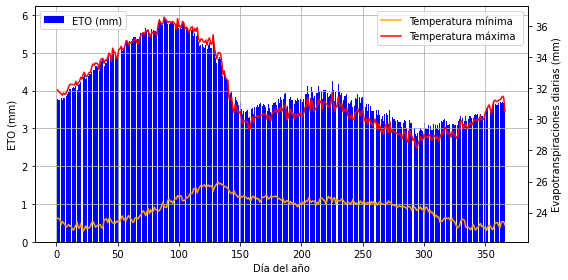

In [10]:
# observamos el comportamiento de la temperatura 

fig, ax = plt.subplots(figsize=(8,4))
ax.set_ylabel('ETO (mm)')  # we already handled the x-label with ax1
rects3= ax.bar(lst,df_doy['eto'], color='blue',
        label='ETO (mm)')
ax.set_xlabel('Día del año')
ax.grid(True)
ax.legend(loc="upper left")

ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('Evapotranspiraciones diarias (mm)')
rects1= ax1.plot(lst, df_doy['t_min'], color='orange',
        label='Temperatura mínima ')
rects1= ax1.plot(lst, df_doy['t_max'], color='red',
        label='Temperatura máxima ')


ax1.legend(loc="upper right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()


#### Se concluye que existe una relación lineal entre la temperatura máxima y la evapotranspiración 

Este dato es muy importante para cuando construyamos el vector con los pesos de cada factor 


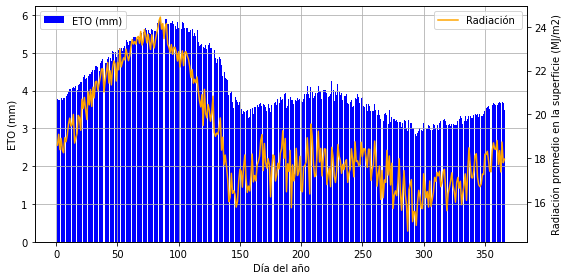

In [11]:
# observamos el comportamiento de la radiación  

fig, ax = plt.subplots(figsize=(8,4))
ax.set_ylabel('ETO (mm)')  # we already handled the x-label with ax1
rects3= ax.bar(lst,df_doy['eto'], color='blue',
        label='ETO (mm)')
ax.set_xlabel('Día del año')
ax.grid(True)
ax.legend(loc="upper left")

ax1 = ax.twinx()  # instantiate a second axes that shares the same x-axis

ax1.set_ylabel('Radiación promedio en la superficie (MJ/m2)')
rects1= ax1.plot(lst, df_doy['surface_rad'], color='orange',
        label='Radiación ')

ax1.legend(loc="upper right")
fig.tight_layout()  # otherwise the right y-label is slightly clipped

plt.show()

# Aprendizaje Supervisado

##Paso 1. Definicion de funciones para poder analizar el DataSet con diferentes enfoques usando varios metodos

In [12]:
#Funcion para division de Datos para Training and Testing
def Data_Segregation(features,targets, x=5, verification = False):
  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(features,targets, random_state=x) 

  #Verificamos los tamaños:
  if verification:
    print("Segregation verification, sizes:")
    print("X_train= ",X_train.shape)
    print("X_test= ",X_test.shape)
    print("y_train= ",y_train.shape)
    print("y_test= ",y_test.shape)

  return X_train, X_test, y_train, y_test


In [13]:
#Funcion para correr un modelo lineal 
def Linear_Regression(X_train, X_test, y_train, y_test, showScore = False, positiveBool=False):
  from sklearn.linear_model import LinearRegression
  lr=LinearRegression(positive = positiveBool).fit(X_train,y_train)

  trainScore = lr.score(X_train,y_train)
  testScore = lr.score(X_test,y_test)                      
  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)
  
  return trainScore, testScore


In [14]:
#Funcion para correr modelo lineal Ridge
def LRRidge(X_train, X_test, y_train, y_test, showScore = False, positiveBool=False, alphaNum = 1.0):
  from sklearn import linear_model
  reg = linear_model.Ridge(alpha=alphaNum, positive = positiveBool).fit(X_train,y_train)
  
  trainScore = reg.score(X_train,y_train)
  testScore = reg.score(X_test,y_test)                      
  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)
  
  return trainScore, testScore

In [15]:
#Funcion para correr SVM
def SVMachine(X_train, X_test, y_train, y_test, showScore = False, kernelStr="rbf", Creg=1.0, gammaStr="scale"):
  from sklearn.svm import SVR
  LinearSVR = SVR(kernel = kernelStr, C = Creg, gamma = gammaStr)

  #svr=LinearSVR().fit(X_train,y_train)
  LinearSVR.fit(X_train,y_train)

  trainScore = LinearSVR.score(X_train,y_train)
  testScore = LinearSVR.score(X_test,y_test)    

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  return trainScore, testScore


In [16]:
#Funcion para correr Nearest Neighbors Regression
def kNNRegression(X_train, X_test, y_train, y_test, showScore = False, n=5,weightsStr="uniform", algorithmStr="auto"):
  from sklearn.neighbors import KNeighborsRegressor
  neigh = KNeighborsRegressor(n_neighbors=n,weights=weightsStr, algorithm=algorithmStr)
  neigh.fit(X_train, y_train)

  trainScore = neigh.score(X_train,y_train)
  testScore = neigh.score(X_test,y_test) 

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  return trainScore, testScore


In [17]:
#Funcion para usar DecisionTreeRegressor

def DTRegressor (X_train, X_test, y_train, y_test, showScore = False, showClassifier = False, n=100, criterionStr = "squared_error", depth=None):
  from sklearn.ensemble import RandomForestRegressor
  reg_forest = RandomForestRegressor(n_estimators = n, criterion = criterionStr, max_depth = depth)
  reg_forest = reg_forest.fit(X_train, y_train)

  trainScore = reg_forest.score(X_train,y_train)
  testScore = reg_forest.score(X_test,y_test) 

  if showScore:
    print("Train score= ", trainScore)
    print("Test score= ", testScore)

  if showClassifier:
    print("Showing importances features classification:")
    from sklearn.ensemble import RandomForestClassifier
    importances = pd.DataFrame({'feature' : X_train.columns, 'importance':reg_forest.feature_importances_})
    importances = importances.sort_values('importance', ascending = False).set_index('feature')
    from matplotlib import pyplot as plt
    plt.style.use('ggplot')
    importances.plot.bar()

  return trainScore, testScore


## Paso 2. Seleccion de columnas, division de los datos para entrenamiento y prueba, y definicion de Casos.



**Descripcion de la dinamica:**
Se usara el mismo DataSet anlizado en el pre-procesado, solo que se dividiran en diferentes casos, para poder analizar los datos con diferentes herramientas y tambien ver las diferentes relaciones entre las variables:



**Caso 1: Se usaran las radiciones y temperaturas para poder predecir el ETO**
- Features: 'top_rad','surface_rad','t_max'
- Targets: 'eto'

El objetivo de este caso es verificar la relacion lineal encontrada en el pre-procesado entre la temperatura maxima y el ETO

**Caso 2: Se usaran las demas caracteristicas, excluyendo ETO, para poder predecir la temperatura maxima**
- Features: 'top_rad','surface_rad','uva-ra','rel_hum','surface_pres','prec'
- Targets: 't_max'

El objetivo de este segundo caso es entender la relacion de las demas caracteristicas o variables con la temperatura maxima, ya que al parecer es la predominante al relacionarse con el ETO

In [18]:
#Seleccioamos solo las columnas a usar
#Se excluye temperatura minima, basado en resultados del pre-procesado

cols_to_use = ['top_rad','surface_rad','uva-ra','eto','rel_hum','surface_pres','prec','t_max']
df = df[cols_to_use]
df.shape


(7099, 8)

##Paso 3: Caso 1. Aplicacion de los difernetes metodos de regresion

Definicion de Features y Targets, con la separacion de los Datos para Training & Testing

In [19]:
#Definicion de features o targets, segun caso

features = df[['top_rad','surface_rad','t_max']]
targets = df['eto']


In [20]:
#Uso de funcion Data_Segregation, con un random_state de 13 y la visualizacion de tamanos activa
X_train, X_test, y_train, y_test = Data_Segregation (features,targets, 13, True)

Segregation verification, sizes:
X_train=  (5324, 3)
X_test=  (1775, 3)
y_train=  (5324,)
y_test=  (1775,)


### Aplicacion de los modelos de regresion 

In [21]:
#Creacion de un DataFrame para almacenar los diferentes Scores 
import pandas as pd

#Definicion de columnas
columnsSummary = ['Model', 'Training Score', 'Testing Score', 'Details']

# Creacion del Data Frame vacio
dfScores = pd.DataFrame(columns = columnsSummary)


####Modelos Lineales

In [22]:
#Uso de funcion Linear_Regression, con visualizacion de Scores y opcion de Non-negative least squares en el ultimo parametro de la funcion
#("When set to True, forces the coefficients to be positive")

print("Ordinary Least Squares")
a, b = Linear_Regression(X_train, X_test, y_train, y_test, True, False)
dfScores = dfScores.append({'Model': "Ordinary Least Squares", 'Training Score' : a, 'Testing Score' : b, 'Details': "N/A"}, ignore_index = True)

print("\n")
print("Ordinary Least Squares and Non-negative least squares")
a, b = Linear_Regression(X_train, X_test, y_train, y_test, True, True)
dfScores = dfScores.append({'Model': "Ordinary Least Squares", 'Training Score' : a, 'Testing Score' : b, 'Details': "Non-negative least squares"}, ignore_index = True)

Ordinary Least Squares
Train score=  0.9632280104173241
Test score=  0.9623943370092025


Ordinary Least Squares and Non-negative least squares
Train score=  0.9632280104173241
Test score=  0.9623943370092024


<ipython-input-22-7866704201a2>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "Ordinary Least Squares", 'Training Score' : a, 'Testing Score' : b, 'Details': "N/A"}, ignore_index = True)
<ipython-input-22-7866704201a2>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "Ordinary Least Squares", 'Training Score' : a, 'Testing Score' : b, 'Details': "Non-negative least squares"}, ignore_index = True)


In [23]:
#Uso de funcion LRRidge, con visualizacion de Scores, opcion de Non-negative least squares y opcion de Regularization strength (alpha)

print("Ridge regression and alpha equal to 0.5")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, False, 0.5)
dfScores = dfScores.append({'Model': "Ridge regression", 'Training Score' : a, 'Testing Score' : b, 'Details': "Alpha = 0.5"}, ignore_index = True)
print("\n")
print("Ridge regression and alpha equal to 0.1")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, False, 1)
dfScores = dfScores.append({'Model': "Ridge regression", 'Training Score' : a, 'Testing Score' : b, 'Details': "Alpha = 1"}, ignore_index = True)
print("\n")
print("Ridge regression, alpha equal to 0.5 and Non-negative least squares")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, True, 0.5)
dfScores = dfScores.append({'Model': "Ridge regression", 'Training Score' : a, 'Testing Score' : b, 'Details': "Alpha = 0.5 & Non-negative least squares"}, ignore_index = True)
print("\n")
print("Ridge regression alpha equal to 0.1 and Non-negative least squares")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, True, 1)
dfScores = dfScores.append({'Model': "Ridge regression", 'Training Score' : a, 'Testing Score' : b, 'Details': "Alpha = 1 & Non-negative least squares"}, ignore_index = True)
print("\n")

Ridge regression and alpha equal to 0.5
Train score=  0.9632280102568296
Test score=  0.962394543465349


Ridge regression and alpha equal to 0.1
Train score=  0.9632280097753796
Test score=  0.9623947495878895


Ridge regression, alpha equal to 0.5 and Non-negative least squares
Train score=  0.9632280102580119
Test score=  0.9623945428050322


Ridge regression alpha equal to 0.1 and Non-negative least squares
Train score=  0.9632280097777463
Test score=  0.9623947489289015




<ipython-input-23-8cb588205e6b>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "Ridge regression", 'Training Score' : a, 'Testing Score' : b, 'Details': "Alpha = 0.5"}, ignore_index = True)
<ipython-input-23-8cb588205e6b>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "Ridge regression", 'Training Score' : a, 'Testing Score' : b, 'Details': "Alpha = 1"}, ignore_index = True)
<ipython-input-23-8cb588205e6b>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "Ridge regression", 'Training Score' : a, 'Testing Score' : b, 'Details': "Alpha = 0.5 & Non-negative least squares"}, ignore_index = True)
<ipython-input-23-

#### Modelo Maquina de Soporte Vectorial 

In [24]:
#Uso de la funcion SVMachine con visualizacion de Scores, definicion de Kernel, C y gamma
print("SVM with kernel = rbf, C = 1 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 1, "auto")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = rbf, C = 1 and gamma = auto"}, ignore_index = True)
print("\n")
print("SVM with kernel = rbf, C = 10 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 10, "auto")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = rbf, C = 10 and gamma = auto"}, ignore_index = True)
print("\n")
print("SVM with kernel = linear, C = 1 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "linear", 1, "auto")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = linear, C = 1 and gamma = auto"}, ignore_index = True)
print("\n")
print("SVM with kernel = linear, C = 10 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "linear", 10, "auto")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = linear, C = 10 and gamma = auto"}, ignore_index = True)
print("\n")
print("SVM with kernel = linear, C = 1 and gamma = scale")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "linear", 1, "scale")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = linear, C = 10 and gamma = scale"}, ignore_index = True)
print("\n")

SVM with kernel = rbf, C = 1 and gamma = auto
Train score=  0.975877591751733
Test score=  0.9676250537503345


SVM with kernel = rbf, C = 10 and gamma = auto


<ipython-input-24-02212c51edfb>:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = rbf, C = 1 and gamma = auto"}, ignore_index = True)


Train score=  0.977775715539438
Test score=  0.9660784213425844


SVM with kernel = linear, C = 1 and gamma = auto


<ipython-input-24-02212c51edfb>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = rbf, C = 10 and gamma = auto"}, ignore_index = True)


Train score=  0.9632104555007702
Test score=  0.9623187496119315


SVM with kernel = linear, C = 10 and gamma = auto


<ipython-input-24-02212c51edfb>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = linear, C = 1 and gamma = auto"}, ignore_index = True)


Train score=  0.9632145196097815
Test score=  0.9623425260443068


SVM with kernel = linear, C = 1 and gamma = scale


<ipython-input-24-02212c51edfb>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = linear, C = 10 and gamma = auto"}, ignore_index = True)


Train score=  0.9632104555007702
Test score=  0.9623187496119315




<ipython-input-24-02212c51edfb>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = linear, C = 10 and gamma = scale"}, ignore_index = True)


#### KNN KNeighbors Regressor 

In [25]:
#Uso de la funcion kNNRegression con visualizacion de Scores, definicion de neighbors, weights y algorithm

#kNNRegression(X_train, X_test, y_train, y_test, showScore, n, weights, algorithm)
#n: Number of neighbors to use
#weights = 'uniform', assigns equal weights to all points. 
#weights = 'distance' assigns weights proportional to the inverse of the distance from the query point
#algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
#Algorithm used to compute the nearest neighbors

print("KNN regression with neighbors = 2, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 2, "uniform", "auto")
dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 2, weights = uniform and  algorithm = auto"}, ignore_index = True)
print("\n")
print("KNN regression with neighbors = 200, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 200, "uniform", "auto")
dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 200, weights = uniform and  algorithm = auto"}, ignore_index = True)
print("\n")
print("KNN regression with neighbors = 500, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 500, "uniform", "auto")
dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 500, weights = uniform and  algorithm = auto"}, ignore_index = True)
print("\n")
print("KNN regression with neighbors = 750, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 750, "uniform", "auto")
dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 750, weights = uniform and  algorithm = auto"}, ignore_index = True)
print("\n")
print("KNN regression with neighbors = 500, weights = distance and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 500, "distance", "auto")
dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 500, weights = distance and  algorithm = auto"}, ignore_index = True)
print("\n")

KNN regression with neighbors = 2, weights = uniform and  algorithm = auto
Train score=  0.9864094053889036
Test score=  0.9594363824618014


KNN regression with neighbors = 200, weights = uniform and  algorithm = auto


<ipython-input-25-fff4ce9958b1>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 2, weights = uniform and  algorithm = auto"}, ignore_index = True)


Train score=  0.9542580397799199
Test score=  0.9533264481682265


KNN regression with neighbors = 500, weights = uniform and  algorithm = auto


<ipython-input-25-fff4ce9958b1>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 200, weights = uniform and  algorithm = auto"}, ignore_index = True)


Train score=  0.9329065523047755
Test score=  0.9331751470914511


KNN regression with neighbors = 750, weights = uniform and  algorithm = auto


<ipython-input-25-fff4ce9958b1>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 500, weights = uniform and  algorithm = auto"}, ignore_index = True)


Train score=  0.9162300881014404
Test score=  0.9168944127835391


KNN regression with neighbors = 500, weights = distance and  algorithm = auto


<ipython-input-25-fff4ce9958b1>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 750, weights = uniform and  algorithm = auto"}, ignore_index = True)


Train score=  1.0
Test score=  0.9443992230509928




<ipython-input-25-fff4ce9958b1>:28: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 500, weights = distance and  algorithm = auto"}, ignore_index = True)


#### Decision Tree Regressor

In [26]:
#Uso de la funcion DTRegressor con visualizacion de Scores, visualizacion de clasificacion de features, definicion de estimators, criterion y max_depth

#DTRegressor (X_train, X_test, y_train, y_test, showScore = False, showClassifier, n, criterion, max_depth)
#n_estimators: The number of trees in the forest.
#criterion : {"squared_error", "absolute_error", "poisson"}
#The function to measure the quality of a split. Supported criteria are "squared_error" for the mean squared error, 
#which is equal to variance reduction as feature selection criterion, "absolute_error" for the mean absolute error, 
#and "poisson" which uses reduction in Poisson deviance to find splits. Training using "absolute_error" is significantly 
#slower than when using "squared_error".
#max_depth: The maximum depth of the tree. 
#If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

print("DecisionTreeRegressor with n_estimators = 10, criterion = squared_error and max_depth = None")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True, False, 10, "squared_error", None)
dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 10, criterion = squared_error and max_depth = None"}, ignore_index = True)
print("\n")
print("DecisionTreeRegressor with n_estimators = 100, criterion = squared_error and max_depth = None")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True, False, 100, "squared_error", None)
dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 100, criterion = squared_error and max_depth = None"}, ignore_index = True)
print("\n")
print("DecisionTreeRegressor with n_estimators = 10, criterion = squared_error and max_depth = 5")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True, False, 10, "squared_error", 5)
dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 10, criterion = squared_error and max_depth = 5"}, ignore_index = True)
print("\n")
print("DecisionTreeRegressor with n_estimators = 10, criterion = absolute_error and max_depth = None")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True, False, 10, "absolute_error", None)
dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 10, criterion = absolute_error and max_depth = None"}, ignore_index = True)
print("\n")
print("DecisionTreeRegressor with n_estimators = 10, criterion = poisson and max_depth = None")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True, False, 10, "poisson", None)
dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 10, criterion = poisson and max_depth = None"}, ignore_index = True)
print("\n")

DecisionTreeRegressor with n_estimators = 10, criterion = squared_error and max_depth = None
Train score=  0.9944096104003797
Test score=  0.9654039983552299


DecisionTreeRegressor with n_estimators = 100, criterion = squared_error and max_depth = None


<ipython-input-26-ffb1b38cde22>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 10, criterion = squared_error and max_depth = None"}, ignore_index = True)


Train score=  0.995809345684443
Test score=  0.9674522469823327


DecisionTreeRegressor with n_estimators = 10, criterion = squared_error and max_depth = 5
Train score=  0.9693514707567726
Test score=  0.9635863577751697


DecisionTreeRegressor with n_estimators = 10, criterion = absolute_error and max_depth = None


<ipython-input-26-ffb1b38cde22>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 100, criterion = squared_error and max_depth = None"}, ignore_index = True)
<ipython-input-26-ffb1b38cde22>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 10, criterion = squared_error and max_depth = 5"}, ignore_index = True)


Train score=  0.9940192206006377
Test score=  0.9650192803878934


DecisionTreeRegressor with n_estimators = 10, criterion = poisson and max_depth = None


<ipython-input-26-ffb1b38cde22>:27: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 10, criterion = absolute_error and max_depth = None"}, ignore_index = True)


Train score=  0.992924422437428
Test score=  0.9558322157337604




<ipython-input-26-ffb1b38cde22>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 10, criterion = poisson and max_depth = None"}, ignore_index = True)


###Metodo de Emsamble

#### Voting Regressor

In [27]:
#ensemble methods
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=10)
reg2 = RandomForestRegressor(random_state=10)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)


In [28]:
a = ereg.score(X_train,y_train)
b = ereg.score(X_test,y_test)
print("Train score= ", a)
print("Test score= ", b)
dfScores = dfScores.append({'Model': "Voting Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "3 methods used"}, ignore_index = True)

Train score=  0.9829543641666864
Test score=  0.9700245615616411


<ipython-input-28-ade60c1c868f>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfScores = dfScores.append({'Model': "Voting Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "3 methods used"}, ignore_index = True)


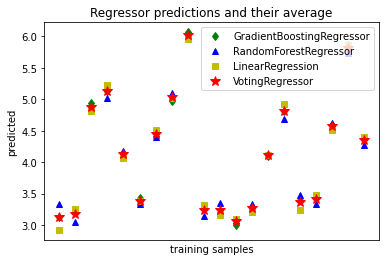

In [29]:
reg1.fit(X_train,y_train)
reg2.fit(X_train,y_train)
reg3.fit(X_train,y_train)

xt = X_train[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()



###Results Summary - Caso 1

In [30]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

#Desplegar tabla resumen de resultados
print("Scores Summary Table")
display(dfScores)
print("=========================================================================================================")
print("Highest Training Score:")
tempMaxScore = dfScores['Training Score'].max()
display(dfScores[dfScores['Training Score'] == tempMaxScore])
print("=========================================================================================================")
print("Highest Testing Score:")
tempMaxScore = dfScores['Testing Score'].max()
display(dfScores[dfScores['Testing Score'] == tempMaxScore])


ModuleNotFoundError: No module named 'google'

In [ ]:
print("Decision Tree Regression - importances features")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True, True, 100, "squared_error", None)

###Concluciones del Caso 1

En base a las pruebas realizadas y los datos seleccionados se tiene que el mejor resultado lo tiene el Metodo de Emsamble Voting Regressor, ya que tiene los Scores (training & testing) mas altos de manera balanceada. Ademas, basado en el grafico de las caracteristicas mas importantes, en la celda anterior, temperatura maxima es la caracteristica predominante para predecir ETO.

##Paso 4: Caso 2. Aplicacion de los diferentes metodos de regresion

Definicion de Features y Targets, con la separacion de los Dtaos para Training & Testing

In [ ]:
#Definicion de features o targets, segun caso

features = df[['top_rad','surface_rad','uva-ra','rel_hum','surface_pres','prec']]
targets = df['t_max']



In [ ]:
#Uso de funcion Data_Segregation, con un random_state de 13 y la visualizacion de tamanos activa
X_train, X_test, y_train, y_test = Data_Segregation (features,targets, 13, True)

### Aplicacion de los modelos de regresion 

In [ ]:
#Creacion de un DataFrame para almacenar los difernetes Scores 
import pandas as pd

#Definicion de columnas
columnsSummary = ['Model', 'Training Score', 'Testing Score', 'Details']

# Creacion del Data Frame vacio
dfScores = pd.DataFrame(columns = columnsSummary)


####Modelos Lineales

In [ ]:
#Uso de funcion Linear_Regression, con visualizacion de Scores y opcion de Non-negative least squares en el ultimo parametro de la funcion
#("When set to True, forces the coefficients to be positive")

print("Ordinary Least Squares")
a, b = Linear_Regression(X_train, X_test, y_train, y_test, True, False)
dfScores = dfScores.append({'Model': "Ordinary Least Squares", 'Training Score' : a, 'Testing Score' : b, 'Details': "N/A"}, ignore_index = True)

print("\n")
print("Ordinary Least Squares and Non-negative least squares")
a, b = Linear_Regression(X_train, X_test, y_train, y_test, True, True)
dfScores = dfScores.append({'Model': "Ordinary Least Squares", 'Training Score' : a, 'Testing Score' : b, 'Details': "Non-negative least squares"}, ignore_index = True)

In [ ]:
#Uso de funcion LRRidge, con visualizacion de Scores, opcion de Non-negative least squares y opcion de Regularization strength (alpha)

print("Ridge regression and alpha equal to 0.5")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, False, 0.5)
dfScores = dfScores.append({'Model': "Ridge regression", 'Training Score' : a, 'Testing Score' : b, 'Details': "Alpha = 0.5"}, ignore_index = True)
print("\n")
print("Ridge regression and alpha equal to 0.1")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, False, 1)
dfScores = dfScores.append({'Model': "Ridge regression", 'Training Score' : a, 'Testing Score' : b, 'Details': "Alpha = 1"}, ignore_index = True)
print("\n")
print("Ridge regression, alpha equal to 0.5 and Non-negative least squares")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, True, 0.5)
dfScores = dfScores.append({'Model': "Ridge regression", 'Training Score' : a, 'Testing Score' : b, 'Details': "Alpha = 0.5 & Non-negative least squares"}, ignore_index = True)
print("\n")
print("Ridge regression alpha equal to 0.1 and Non-negative least squares")
a, b = LRRidge(X_train, X_test, y_train, y_test, True, True, 1)
dfScores = dfScores.append({'Model': "Ridge regression", 'Training Score' : a, 'Testing Score' : b, 'Details': "Alpha = 1 & Non-negative least squares"}, ignore_index = True)
print("\n")

#### Modelo Maquina de Soporte Vectorial 

In [ ]:
#Uso de la funcion SVMachine con visualizacion de Scores, definicion de Kernel, C y gamma
print("SVM with kernel = rbf, C = 1 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 1, "auto")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = rbf, C = 1 and gamma = auto"}, ignore_index = True)
print("\n")
print("SVM with kernel = rbf, C = 10 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "rbf", 10, "auto")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = rbf, C = 10 and gamma = auto"}, ignore_index = True)
print("\n")
print("SVM with kernel = linear, C = 1 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "linear", 1, "auto")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = linear, C = 1 and gamma = auto"}, ignore_index = True)
print("\n")
print("SVM with kernel = linear, C = 10 and gamma = auto")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "linear", 10, "auto")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = linear, C = 10 and gamma = auto"}, ignore_index = True)
print("\n")
print("SVM with kernel = linear, C = 1 and gamma = scale")
a, b = SVMachine(X_train, X_test, y_train, y_test, True, "linear", 1, "scale")
dfScores = dfScores.append({'Model': "SVM", 'Training Score' : a, 'Testing Score' : b, 'Details': "kernel = linear, C = 10 and gamma = scale"}, ignore_index = True)
print("\n")

#### KNN KNeighbors Regressor 

In [ ]:
#Uso de la funcion kNNRegression con visualizacion de Scores, definicion de neighbors, weights y algorithm

#kNNRegression(X_train, X_test, y_train, y_test, showScore, n, weights, algorithm)
#n: Number of neighbors to use
#weights = 'uniform', assigns equal weights to all points. 
#weights = 'distance' assigns weights proportional to the inverse of the distance from the query point
#algorithm{‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’}, default=’auto’
#Algorithm used to compute the nearest neighbors

print("KNN regression with neighbors = 2, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 2, "uniform", "auto")
dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 2, weights = uniform and  algorithm = auto"}, ignore_index = True)
print("\n")
print("KNN regression with neighbors = 200, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 200, "uniform", "auto")
dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 200, weights = uniform and  algorithm = auto"}, ignore_index = True)
print("\n")
print("KNN regression with neighbors = 500, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 500, "uniform", "auto")
dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 500, weights = uniform and  algorithm = auto"}, ignore_index = True)
print("\n")
print("KNN regression with neighbors = 750, weights = uniform and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 750, "uniform", "auto")
dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 750, weights = uniform and  algorithm = auto"}, ignore_index = True)
print("\n")
print("KNN regression with neighbors = 500, weights = distance and  algorithm = auto")
a, b = kNNRegression(X_train, X_test, y_train, y_test, True, 500, "distance", "auto")
dfScores = dfScores.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Details': "neighbors = 500, weights = distance and  algorithm = auto"}, ignore_index = True)
print("\n")

#### Decision Tree Regressor

In [ ]:
#Uso de la funcion DTRegressor con visualizacion de Scores, visualizacion de clasificacion de features, definicion de estimators, criterion y max_depth

#DTRegressor (X_train, X_test, y_train, y_test, showScore = False, showClassifier, n, criterion, max_depth)
#n_estimators: The number of trees in the forest.
#criterion : {"squared_error", "absolute_error", "poisson"}
#The function to measure the quality of a split. Supported criteria are "squared_error" for the mean squared error, 
#which is equal to variance reduction as feature selection criterion, "absolute_error" for the mean absolute error, 
#and "poisson" which uses reduction in Poisson deviance to find splits. Training using "absolute_error" is significantly 
#slower than when using "squared_error".
#max_depth: The maximum depth of the tree. 
#If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

print("DecisionTreeRegressor with n_estimators = 10, criterion = squared_error and max_depth = None")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True, False, 10, "squared_error", None)
dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 10, criterion = squared_error and max_depth = None"}, ignore_index = True)
print("\n")
print("DecisionTreeRegressor with n_estimators = 100, criterion = squared_error and max_depth = None")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True, False, 100, "squared_error", None)
dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 100, criterion = squared_error and max_depth = None"}, ignore_index = True)
print("\n")
print("DecisionTreeRegressor with n_estimators = 10, criterion = squared_error and max_depth = 5")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True, False, 10, "squared_error", 5)
dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 10, criterion = squared_error and max_depth = 5"}, ignore_index = True)
print("\n")
print("DecisionTreeRegressor with n_estimators = 10, criterion = absolute_error and max_depth = None")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True, False, 10, "absolute_error", None)
dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 10, criterion = absolute_error and max_depth = None"}, ignore_index = True)
print("\n")
print("DecisionTreeRegressor with n_estimators = 10, criterion = poisson and max_depth = None")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True, False, 10, "poisson", None)
dfScores = dfScores.append({'Model': "Decision Tree Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "n_estimators = 10, criterion = poisson and max_depth = None"}, ignore_index = True)
print("\n")

###Metodo de Emsamble

#### Voting Regressor

In [ ]:
#ensemble methods
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

# Training classifiers
reg1 = GradientBoostingRegressor(random_state=10)
reg2 = RandomForestRegressor(random_state=10)
reg3 = LinearRegression()
ereg = VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg = ereg.fit(X_train, y_train)


In [ ]:
a = ereg.score(X_train,y_train)
b = ereg.score(X_test,y_test)
print("Train score= ", a)
print("Test score= ", b)
dfScores = dfScores.append({'Model': "Voting Regressor", 'Training Score' : a, 'Testing Score' : b, 'Details': "3 methods used"}, ignore_index = True)

In [ ]:
reg1.fit(X_train,y_train)
reg2.fit(X_train,y_train)
reg3.fit(X_train,y_train)

xt = X_train[:20]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)

plt.figure()
plt.plot(pred1, "gd", label="GradientBoostingRegressor")
plt.plot(pred2, "b^", label="RandomForestRegressor")
plt.plot(pred3, "ys", label="LinearRegression")
plt.plot(pred4, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")

plt.show()



###Results Summary - Caso 2

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

#Desplegar tabla resumen de resultados
print("Scores Summary Table")
display(dfScores)
print("=========================================================================================================")
print("Highest Training Score:")
tempMaxScore = dfScores['Training Score'].max()
display(dfScores[dfScores['Training Score'] == tempMaxScore])
print("=========================================================================================================")
print("Highest Testing Score:")
tempMaxScore = dfScores['Testing Score'].max()
display(dfScores[dfScores['Testing Score'] == tempMaxScore])


In [ ]:
print("Decision Tree Regression - importances features")
a, b = DTRegressor (X_train, X_test, y_train, y_test, True, True, 100, "squared_error", None)

###Concluciones del Caso 2

En base a las pruebas realizadas y los datos seleccionados se tiene que el mejor resultado lo tiene el Metodo de Emsamble Voting Regressor, ya que tiene los Scores (training & testing) mas altos de manera balanceada. Ademas, basado en el grafico de las caracteristicas mas importantes, en la celda anterior, humedad relativa es la caracteristica predominante para predecir temperatura maxima.

##Conclusion Final

Basado en los datos y los metodos probados, el altgoritmo con mejor resultado fue el metodo de ensable Voting Regressor, para ambos casos.

##Analisis Adicionales

###Observar el comportamiento de KNN con diferentes valores de neighbors

In [ ]:
#Creacion de un DataFrame para almacenar los difernetes Scores 
import pandas as pd

#Definicion de columnas
columnsKNN = ['Model', 'Training Score', 'Testing Score', 'Neighbors']

# Creacion del Data Frame vacio
dfScoresKNN = pd.DataFrame(columns = columnsKNN)

In [ ]:
Neighbors = [1, 2,5,6,7,10]

for j in Neighbors:
  #Se usa la misma funcion utilizada anteriormente para KNN KNeighbors Regressor
  a, b = kNNRegression(X_train, X_test, y_train, y_test, False, j, "uniform", "auto")
  dfScoresKNN = dfScoresKNN.append({'Model': "KNN", 'Training Score' : a, 'Testing Score' : b, 'Neighbors': j}, ignore_index = True)

display(dfScoresKNN)

In [ ]:
# importing package
import matplotlib.pyplot as plt
  
x0 = dfScoresKNN['Neighbors']
y1 = dfScoresKNN['Training Score']
y2 = dfScoresKNN['Testing Score']
  
# plot lines
plt.plot(x0, y1, label = "Training Score", marker='o')
plt.plot(x0, y2, label = "Testing Score", marker='o')
plt.ylim([0.85, 1])
plt.title("Relation between Neighbors and Scores in a KNN Regression")
plt.xlabel("Neighbors")
plt.ylabel("Scores")
plt.legend()
plt.show()

**Conclusion:** Basado en la tabla de los Scores obtenidos con diferentes Neighbors, el mejor caso fue cuando se establecio dicho hyper-parametro con valor de 10, ya que fue donde se obtuvo los Scores (Train & Test) mas similares.

###Observar el comportamiento de Decision Tree Regressor con diferentes valores de n_estimators

In [ ]:
#Creacion de un DataFrame para almacenar los difernetes Scores 
import pandas as pd

#Definicion de columnas
columnsDTR = ['Model', 'Training Score', 'Testing Score', 'n_estimators']

# Creacion del Data Frame vacio
dfScoresDTR = pd.DataFrame(columns = columnsDTR)

In [ ]:
n_estimators = [1, 10, 50, 100, 250, 500]

for j in n_estimators:
  #Se usa la misma funcion utilizada anteriormente para Decision Tree Regressor
  a, b = DTRegressor (X_train, X_test, y_train, y_test, False, False, j, "squared_error", None)  
  dfScoresDTR = dfScoresDTR.append({'Model': "DTR", 'Training Score' : a, 'Testing Score' : b, 'n_estimators': j}, ignore_index = True)

display(dfScoresDTR)

In [ ]:
# importing package
import matplotlib.pyplot as plt
  
x0 = dfScoresDTR['n_estimators']
y1 = dfScoresDTR['Training Score']
y2 = dfScoresDTR['Testing Score']
  
# plot lines
plt.plot(x0, y1, label = "Training Score", marker='o')
plt.plot(x0, y2, label = "Testing Score", marker='o')
plt.ylim([0.82, 1])
plt.title("Relation between n_estimators and Scores in a DT Regression")
plt.xlabel("Neighbors")
plt.ylabel("Scores")
plt.legend()
plt.show()

**Conclusion:** Basado en la tabla de los Scores obtenidos con diferentes n_estimators, el mejor caso fue cuando se establecio dicho hyper-parametro con valor mayor a 10, ya que fue donde se obtuvo los Scores (Train & Test) mas similares. A pesar que los Scores mejoran con mayor valor del hyper-parametro, los cambios son muy pequenos, aumentando el procesado de datos, por lo que parece que el mejor valor es alrrededor de 50.